# Supervised Learning

## Classification and Regression

Necessary imports


In [0]:
!pip3 install mglearn

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.datasets import make_blobs



### Supervised Machine Learning Algorithms


#### forge-dataset

The forge dataset has 2 features

X.shape : (26, 2)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


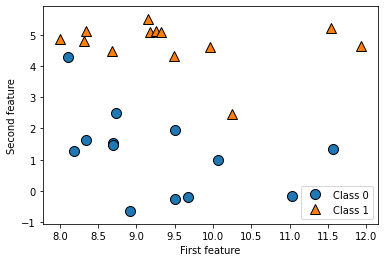

In [0]:
# generate dataset
X, y = mglearn.datasets.make_forge()
# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape : {}".format(X.shape))

#### The synthetic wave-dataset

For illustrating regression the synthetic wave-dataset will be used.
This dataset has a single feature and a continuous target variable.

Text(0, 0.5, 'Target')

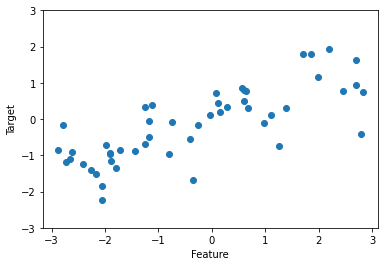

In [0]:
X, y = mglearn.datasets.make_wave(n_samples=50)
plt.plot(X, y, "o")
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

#### The Wisconsin Breast Cancer dataset (cancer)

In [0]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer.keys(): \n{}".format(cancer.keys()))
print("Shape of the cancer data: \n{}".format(cancer.data.shape))
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))
print("Feature names: \n{}".format(cancer.feature_names))

Cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
Shape of the cancer data: 
(569, 30)
Sample counts per class:
{'malignant': 212, 'benign': 357}
Feature names: 
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


#### The Boston Housing dataset

The task associated with this dataset is to predict the median value of homes in serveral Boston neighborhoods in the 1970s, using information such as crime rate, proximity to the Charles River, highway accessibility, and so on. The dataset contains 506 datapoints, described by 13 features.

For our purposes here, we will expand this dataset by not only considering these 13 measurements as input features, but also looking at all products (interactions) between feautres.

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: \n{}".format(boston.data.shape))

X, y = mglearn.datasets.load_extended_boston()
print("X.shape: \n{}".format(X.shape))

Data shape: 
(506, 13)
X.shape: 
(506, 104)


## k-Nearest Neighbors

### k-Neighbors classification

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


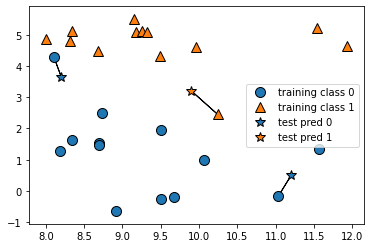

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


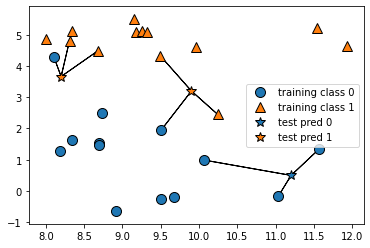

In [0]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [0]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [0]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [0]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [1 0 1 0 1 0 0]


In [0]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


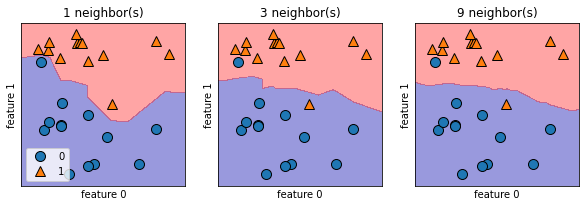

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
  ax.set_title("{} neighbor(s)".format(n_neighbors))
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

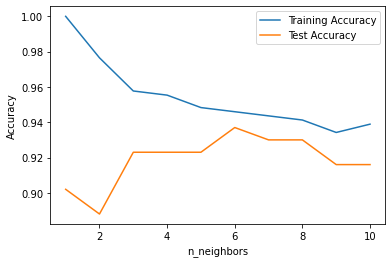

In [0]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  training_accuracy.append(clf.score(X_train, y_train))
  test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### k-neighbors regression

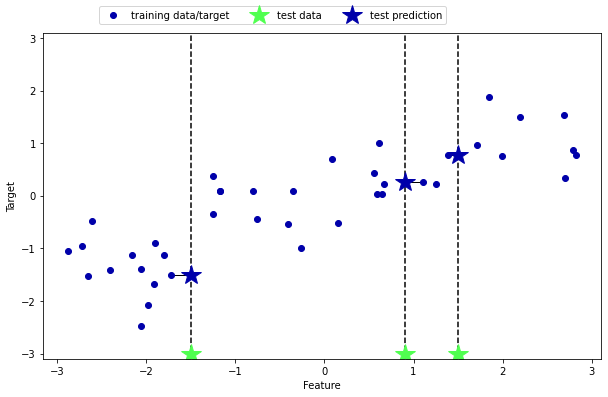

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

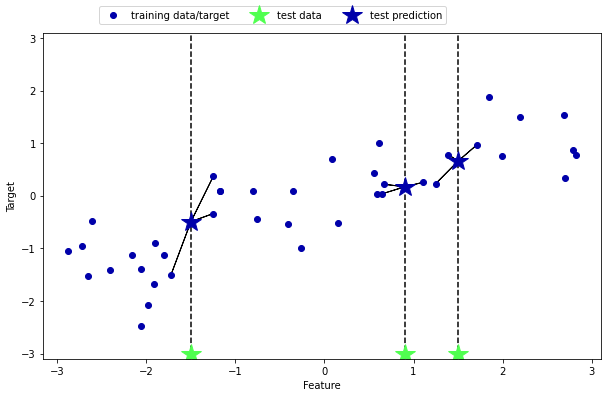

In [0]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [0]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [0]:
print("Test set predictions: \n{}".format(reg.predict(X_test)))

Test set predictions: 
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [0]:
print("Test set score: \n{:.2f}".format(reg.score(X_test, y_test)))

Test set score: 
0.83


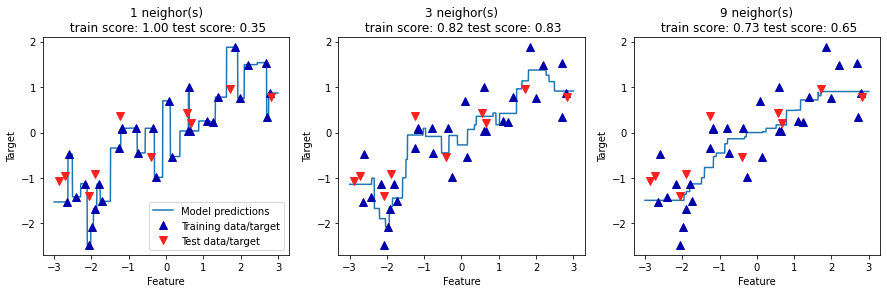

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1,3,9], axes):
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
  ax.set_title(
      "{} neighor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test))
  )
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")


## Linear Models

Linear Models are widly used in practice and have been studied extensively.  
Linear Models make a prediction using a *linear function* of the input features.  
For datasets with many features, linear models can be very powerful.  
In particular, if you have more features than training data points, any target can be perfectly modeled (on the training set) as a linear function.

w[0]: 0.393906  b: -0.031804


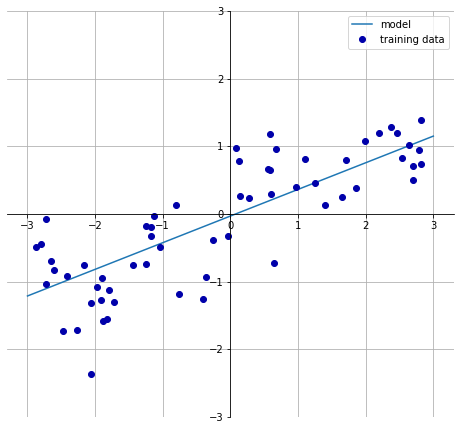

In [0]:
mglearn.plots.plot_linear_regression_wave()

### Linear regression (aka ordinary least squares)

The difference between the different models for regression lies in how the model parameters w and b are learned from the training data. The linear regression is the most popular linear model.  
  
Linear regression, or ordinary least squares (OLS), is the simplest and most classic linear method. It finds the parameters w and b that minimize the mean squared error between predictions and the true regression targets, y, on the training set.

In [0]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [0]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


### Ridge Regression

Ridge regression is also a linear model for regression, so the formula it uses make predictions is the same one used for OLS.